<h1> Allstate Prediction Challenge</h1>
<br>
In this project, we need to predict which car insurance policy would a customer choose based on his car insurance history, location, age of car, value of car, etc.

In [1]:
#Getting Libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
given_data = pd.read_csv('train_allstate.csv')

In [3]:
given_data.head()

,customer_ID,shopping_pt,record_type,day,time,state,location,group_size,homeowner,car_age,...,C_previous,duration_previous,A,B,C,D,E,F,G,cost
0,10000000,1,0,0,08:35,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,2,633
1,10000000,2,0,0,08:38,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
2,10000000,3,0,0,08:38,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
3,10000000,4,0,0,08:39,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630
4,10000000,5,0,0,11:55,IN,10001,2,0,2,...,1.0,2.0,1,0,2,2,1,2,1,630


In [4]:
given_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665249 entries, 0 to 665248
Data columns (total 25 columns):
customer_ID          665249 non-null int64
shopping_pt          665249 non-null int64
record_type          665249 non-null int64
day                  665249 non-null int64
time                 665249 non-null object
state                665249 non-null object
location             665249 non-null int64
group_size           665249 non-null int64
homeowner            665249 non-null int64
car_age              665249 non-null int64
car_value            663718 non-null object
risk_factor          424831 non-null float64
age_oldest           665249 non-null int64
age_youngest         665249 non-null int64
married_couple       665249 non-null int64
C_previous           646538 non-null float64
duration_previous    646538 non-null float64
A                    665249 non-null int64
B                    665249 non-null int64
C                    665249 non-null int64
D                   

# Product Options

Each product has 7 customizable options selected by customers, each with 2, 3, or 4 ordinal values possible:

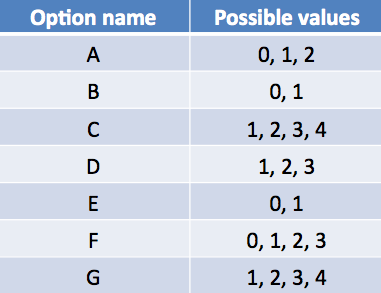

A product is simply a vector with length 7 whose values are chosen from each of the options listed above. The cost of a product is a function of both the product options and customer characteristics.

# Variable Descriptions

<b>customer_ID</b> - A unique identifier for the customer<br>
<b>shopping_pt</b> - Unique identifier for the shopping point of a given customer<br>
<b>record_type</b> - 0=shopping point, 1=purchase point<br>
<b>day</b> - Day of the week (0-6, 0=Monday)<br>
<b>time</b> - Time of day (HH:MM)<br>
<b>state</b> - State where shopping point occurred<br>
<b>location</b> - Location ID where shopping point occurred<br>
<b>group_size</b> - How many people will be covered under the policy (1, 2, 3 or 4)<br>
<b>homeowner</b> - Whether the customer owns a home or not (0=no, 1=yes)<br>
<b>car_age</b> - Age of the customer’s car<br>
<b>car_value</b> - How valuable was the customer’s car when new<br>
<b>risk_factor</b> - An ordinal assessment of how risky the customer is (1, 2, 3, 4)<br>
<b>age_oldest</b> - Age of the oldest person in customer's group<br>
<b>age_youngest</b> - Age of the youngest person in customer’s group<br>
<b>married_couple</b> - Does the customer group contain a married couple (0=no, 1=yes)<br>
<b>C_previous</b> - What the customer formerly had or currently has for product option C (0=nothing, 1, 2, 3,4)<br>
<b>duration_previous</b> -  how long (in years) the customer was covered by their previous issuer<br>
<b>A,B,C,D,E,F,G</b> - the coverage options<br>
<b>cost</b> - cost of the quoted coverage options<br>

In [5]:
train = pd.read_csv('train_allstate.csv')

test = pd.read_csv('test_v2.csv')

train_idx = len(train)


Reading training and testing data<br>

In [6]:
# Training data description
train.describe()

,customer_ID,shopping_pt,record_type,day,location,group_size,homeowner,car_age,risk_factor,age_oldest,...,C_previous,duration_previous,A,B,C,D,E,F,G,cost
count,6.652490e+05,665249.000000,665249.000000,665249.000000,665249.000000,665249.000000,665249.000000,665249.000000,424831.000000,665249.000000,...,646538.000000,646538.000000,665249.000000,665249.000000,665249.000000,665249.000000,665249.000000,665249.000000,665249.000000,665249.000000
mean,1.007655e+07,4.219966,0.145824,1.969429,12271.543022,1.234784,0.536229,8.139437,2.563996,44.992403,...,2.444718,6.003774,0.927546,0.454236,2.275265,2.454299,0.445193,1.162768,2.275120,635.785008
std,4.404978e+04,2.394369,0.352930,1.453470,1564.789415,0.461036,0.498686,5.764598,1.111584,17.403440,...,1.034596,4.680793,0.595221,0.497902,0.990798,0.753953,0.496987,0.943594,0.909567,45.993758
min,1.000000e+07,1.000000,0.000000,0.000000,10001.000000,1.000000,0.000000,0.000000,1.000000,18.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,260.000000
25%,1.003852e+07,2.000000,0.000000,1.000000,10936.000000,1.000000,0.000000,3.000000,2.000000,28.000000,...,1.000000,2.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,2.000000,605.000000
50%,1.007640e+07,4.000000,0.000000,2.000000,12027.000000,1.000000,1.000000,7.000000,3.000000,44.000000,...,3.000000,5.000000,1.000000,0.000000,2.000000,3.000000,0.000000,1.000000,2.000000,635.000000
75%,1.011470e+07,6.000000,0.000000,3.000000,13426.000000,1.000000,1.000000,12.000000,4.000000,60.000000,...,3.000000,9.000000,1.000000,1.000000,3.000000,3.000000,1.000000,2.000000,3.000000,665.000000
max,1.015272e+07,13.000000,1.000000,6.000000,16580.000000,4.000000,1.000000,85.000000,4.000000,75.000000,...,4.000000,15.000000,2.000000,1.000000,4.000000,3.000000,1.000000,3.000000,4.000000,922.000000


I need to check for some missing values in the whole given data.<br>
Therefore, I will append the test and train data.<br>

In [7]:
allstate=train.append(test,ignore_index=True)
allstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864105 entries, 0 to 864104
Data columns (total 25 columns):
customer_ID          864105 non-null int64
shopping_pt          864105 non-null int64
record_type          864105 non-null int64
day                  864105 non-null int64
time                 864105 non-null object
state                864105 non-null object
location             863427 non-null float64
group_size           864105 non-null int64
homeowner            864105 non-null int64
car_age              864105 non-null int64
car_value            861835 non-null object
risk_factor          548200 non-null float64
age_oldest           864105 non-null int64
age_youngest         864105 non-null int64
married_couple       864105 non-null int64
C_previous           835625 non-null float64
duration_previous    835625 non-null float64
A                    864105 non-null int64
B                    864105 non-null int64
C                    864105 non-null int64
D                 

From the info of the given dataset, "location", "car_value", "risk_factor", "C_previous", "duration_previous" have some missing values.<br>
Therefore, it is required to find the missing values.<br>
For "car_value" we can take the mode of the given data and fill for null values.

In [8]:
allstate.loc[allstate["car_value"].isnull(),"car_value"]= allstate["car_value"].mode()[0]
allstate["car_value"].describe()

count     864105
unique         9
top            e
freq      286101
Name: car_value, dtype: object

In [9]:
allstate["risk_factor"].describe()

count    548200.000000
mean          2.560700
std           1.111623
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           4.000000
Name: risk_factor, dtype: float64

In [10]:
allstate["risk_factor"].mode()

0    3.0
dtype: float64

Filling null values in "risk_factor" with mode of the data.

In [11]:
allstate.loc[allstate["risk_factor"].isnull(),"risk_factor"]=allstate["risk_factor"].mode()[0]
allstate["risk_factor"].describe()

count    864105.000000
mean          2.721302
std           0.910333
min           1.000000
25%           2.000000
50%           3.000000
75%           3.000000
max           4.000000
Name: risk_factor, dtype: float64

In [12]:
allstate["C_previous"].describe()

count    835625.000000
mean          2.442535
std           1.034428
min           1.000000
25%           1.000000
50%           3.000000
75%           3.000000
max           4.000000
Name: C_previous, dtype: float64

In [13]:
allstate["C_previous"].mode()

0    3.0
dtype: float64

Filling null values in "C_previous" with mode of the data.

In [14]:
allstate.loc[allstate["C_previous"].isnull(),"C_previous"]=allstate["C_previous"].mode()[0]
allstate["C_previous"].describe()

count    864105.000000
mean          2.460908
std           1.022096
min           1.000000
25%           1.000000
50%           3.000000
75%           3.000000
max           4.000000
Name: C_previous, dtype: float64

In [15]:
allstate["duration_previous"].describe()

count    835625.000000
mean          6.073833
std           4.678726
min           0.000000
25%           2.000000
50%           5.000000
75%           9.000000
max          15.000000
Name: duration_previous, dtype: float64

Filling null values in "duration_previous" by mean of the data.

In [37]:
allstate.loc[allstate["duration_previous"].isnull(),"duration_previous"]=allstate["duration_previous"].mean()
allstate["duration_previous"].describe()

count    864105.000000
mean          6.073833
std           4.600977
min           0.000000
25%           2.000000
50%           5.000000
75%           9.000000
max          15.000000
Name: duration_previous, dtype: float64

Null values of "location" can be filled by filling at the just upper value of "location"

In [17]:
for i in range (len(allstate["location"])):
    if(np.isnan(allstate["location"][i])):
        allstate["location"][i]=allstate["location"][i-1];

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
allstate["location"].describe()

count    863427.000000
mean      12283.265509
std        1571.341250
min       10001.000000
25%       10942.000000
50%       12039.000000
75%       13439.000000
max       16581.000000
Name: location, dtype: float64

In [19]:
state_dummies = pd.get_dummies(allstate.state,prefix="state")
carval_dummies = pd.get_dummies(allstate.car_value,prefix="car_value")

In [22]:
allstate=pd.concat([allstate,state_dummies,carval_dummies],axis=1)
allstate.drop('car_value',axis=1,inplace=True)
allstate.drop('state',axis=1,inplace=True)
allstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864105 entries, 0 to 864104
Data columns (total 67 columns):
customer_ID          864105 non-null int64
shopping_pt          864105 non-null int64
record_type          864105 non-null int64
day                  864105 non-null int64
location             864105 non-null float64
group_size           864105 non-null int64
homeowner            864105 non-null int64
car_age              864105 non-null int64
risk_factor          864105 non-null float64
age_oldest           864105 non-null int64
age_youngest         864105 non-null int64
married_couple       864105 non-null int64
C_previous           864105 non-null float64
duration_previous    864105 non-null float64
A                    864105 non-null int64
B                    864105 non-null int64
C                    864105 non-null int64
D                    864105 non-null int64
E                    864105 non-null int64
F                    864105 non-null int64
G                    

In [21]:
allstate.drop('time',axis=1,inplace=True)

In [41]:
train = allstate[:train_idx]
test = allstate[train_idx:]

Histogram of Cost of Insurance

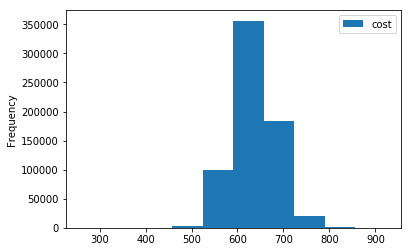

In [42]:
train[["cost"]].plot(kind="hist")

Insurance Cost and Car Age

Text(0.5,1,'Cost Vs Car Age')

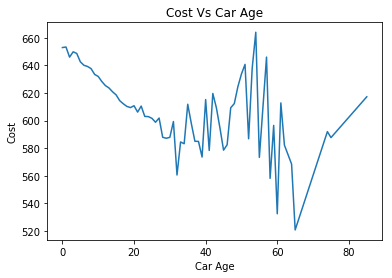

In [43]:
cost_age = train[["cost","car_age"]].groupby("car_age").mean()

plt.plot(cost_age)

plt.xlabel("Car Age")

plt.ylabel("Cost")

plt.title("Cost Vs Car Age")

Cost Correlation with other parameters

In [44]:
train.corr()["cost"]

customer_ID         -0.002250
shopping_pt          0.043419
record_type         -0.011826
day                  0.010793
location             0.002413
group_size          -0.024009
homeowner           -0.213846
car_age             -0.281002
risk_factor          0.118576
age_oldest          -0.210225
age_youngest        -0.238497
married_couple      -0.075193
C_previous          -0.077188
duration_previous   -0.161465
A                    0.325922
B                    0.118573
C                   -0.033931
D                    0.002963
E                    0.259183
F                    0.141707
G                   -0.011274
cost                 1.000000
state_AL            -0.060891
state_AR            -0.007378
state_CO            -0.029220
state_CT             0.045271
state_DC             0.034928
state_DE             0.044324
state_FL             0.036308
state_GA             0.006334
                       ...   
state_MO            -0.075229
state_MS             0.004833
state_MT  

Frequence distribution of Cost correlation

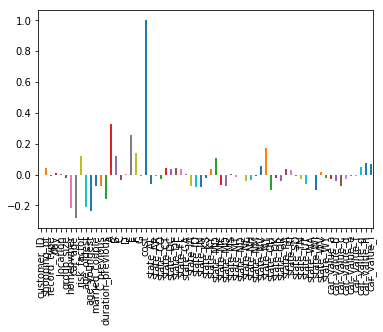

In [45]:
train.corr()["cost"].plot.bar()

Cost and Risk Factor

Text(0.5,1,' Cost ans Risk Factor')

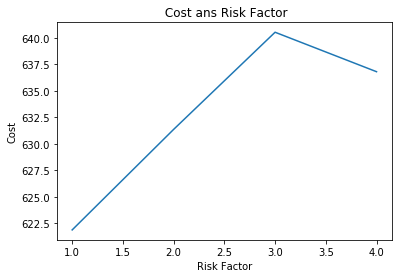

In [46]:
plt.plot(train[["cost","risk_factor"]].groupby("risk_factor").mean())

plt.xlabel("Risk Factor")

plt.ylabel("Cost")

plt.title(" Cost ans Risk Factor")

1. Cost goes down as Age increases.<br>
2. Cost increases as Risk Factor increases.<br>
3. Also A,B,E,F increases with Cost.<br><br>

Correlation of A with other parameters<br>

In [47]:
train.corr()['A']

customer_ID         -0.002306
shopping_pt          0.052803
record_type          0.012162
day                 -0.001005
location            -0.003494
group_size           0.017806
homeowner            0.048471
car_age             -0.436740
risk_factor         -0.056620
age_oldest           0.003914
age_youngest         0.005199
married_couple       0.023021
C_previous           0.115207
duration_previous    0.029747
A                    1.000000
B                    0.158040
C                    0.190519
D                    0.189351
E                    0.324618
F                    0.531186
G                    0.045335
cost                 0.325922
state_AL            -0.028065
state_AR            -0.011290
state_CO             0.015361
state_CT            -0.040975
state_DC            -0.037602
state_DE            -0.012192
state_FL             0.056665
state_GA            -0.017312
                       ...   
state_MO             0.004936
state_MS            -0.023487
state_MT  

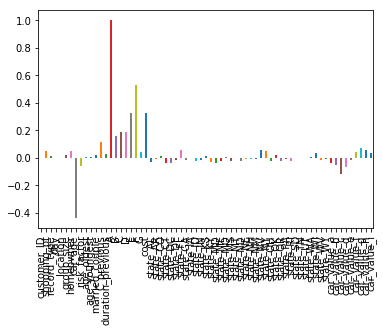

In [48]:
train.corr()['A'].plot.bar()

Correlation of B with other parameters

In [49]:
train.corr()['B']

customer_ID         -0.003188
shopping_pt          0.046609
record_type          0.018135
day                  0.001314
location            -0.007643
group_size           0.027647
homeowner            0.033747
car_age             -0.089334
risk_factor         -0.014859
age_oldest           0.025027
age_youngest         0.017528
married_couple       0.020741
C_previous           0.028490
duration_previous    0.006354
A                    0.158040
B                    1.000000
C                    0.093611
D                    0.122656
E                    0.461271
F                    0.128231
G                    0.024826
cost                 0.118573
state_AL             0.093077
state_AR             0.022732
state_CO             0.003526
state_CT            -0.084679
state_DC             0.002724
state_DE             0.001935
state_FL             0.011277
state_GA             0.019864
                       ...   
state_MO            -0.004922
state_MS             0.039143
state_MT  

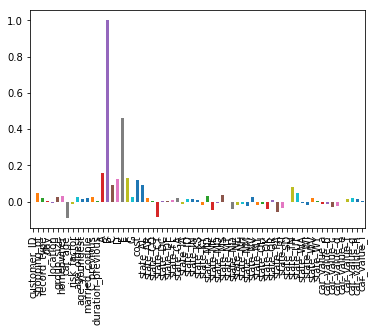

In [51]:
train.corr()['B'].plot.bar()

Correlation of C with other parameters

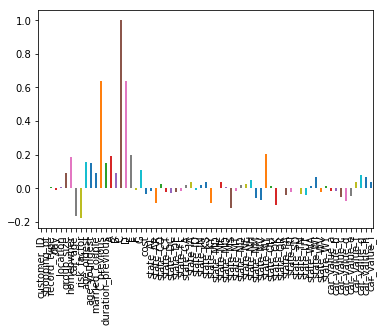

In [50]:
train.corr()['C'].plot.bar()

Correlation of D with other parameters

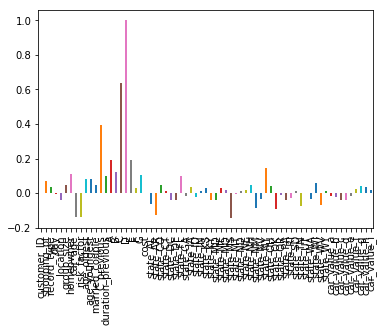

In [53]:
train.corr()['D'].plot.bar()

Correlation of E with other parameters

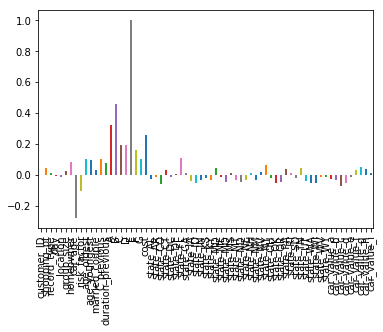

In [52]:
train.corr()['E'].plot.bar()

Coverage A vs Car Age

Text(0.5,1,' Coverage A VS. Car Age')

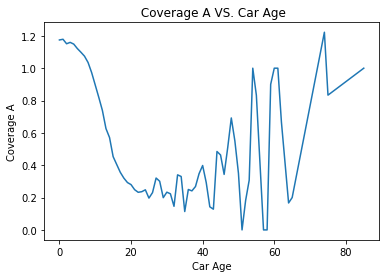

In [54]:
plt.plot(train[["A","car_age"]].groupby("car_age").mean())

plt.xlabel("Car Age")

plt.ylabel("Coverage A")

plt.title(" Coverage A VS. Car Age")

Coverage A is favourable for new cars

In [56]:
X_TEST=train.copy()

X_TEST.drop(['customer_ID','day','location','A','B','C','D','E','F','G'],axis=1,inplace=True)

y_A=train.A.values


Logistic Regression Model

In [57]:
lr=LogisticRegression(C=1000.0,random_state=0)
lr.fit(X_TEST,y_A)
lr.score(X_TEST,y_A)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.7411149810071116

In [58]:
y_B = train.B.values
lr.fit(X_TEST,y_B)
lr.score(X_TEST,y_B)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.60865781083474

In [59]:
y_C = train.C.values
lr.fit(X_TEST,y_C)
lr.score(X_TEST,y_C)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.6175612439853349

In [60]:
y_D = train.D.values
lr.fit(X_TEST,y_D)
lr.score(X_TEST,y_D)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.6582527745250275

In [61]:
y_E = train.E.values
lr.fit(X_TEST,y_E)
lr.score(X_TEST,y_E)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6794929417406114

In [62]:
y_F = train.F.values
lr.fit(X_TEST,y_F)
lr.score(X_TEST,y_F)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.6510479534730604

In [63]:
y_G = train.G.values
lr.fit(X_TEST,y_G)
lr.score(X_TEST,y_G)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.5938077321424008